In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [6]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


# Load data


In [13]:
%%R
df <- read_csv('merged_df_census_mda.csv')
df

Rows: 24147 Columns: 111
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (12): lei, state_code, derived_ethnicity, derived_race, derived_sex, der...
dbl (98): census_tract, activity_year, county_code, loan_type, business_or_c...
lgl  (1): denial_reason.4

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 24,147 × 111
   census_tract activity_year lei       state_code county_code derived_ethnicity
          <dbl>         <dbl> <chr>     <chr>            <dbl> <chr>            
 1  36005000200          2023 RVDPPPGH… NY               36005 Ethnicity Not Av…
 2  36005000200          2023 RVDPPPGH… NY               36005 Ethnicity Not Av…
 3  36005000200          2023 DRMSV1Q0… NY               36005 Ethnicity Not Av…
 4  36005000200          2023 DRMSV1Q0… NY               36005 Hispanic or Lati…
 5  36005000200          20

In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


In [14]:
%%R
library(dplyr)

df <- df %>%
  mutate(
    loan_purpose_label = recode(
      loan_purpose,
      `1` = "Home Purchase",
      `2` = "Home Improvement",
      `31` = "Refinancing",
      `32` = "Cash-out Refinancing",
      `4` = "Other Purpose",
      `5` = "Not Applicable"
    )
  )


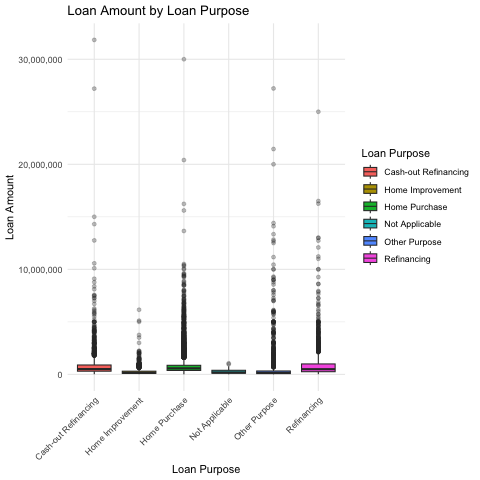

In [15]:
%%R
library(ggplot2)
library(scales)

ggplot(df, aes(x = loan_purpose_label, y = loan_amount, fill = loan_purpose_label)) +
  geom_boxplot(outlier.alpha = 0.3) +
  scale_y_continuous(labels = comma) +
  labs(
    title = "Loan Amount by Loan Purpose",
    x = "Loan Purpose",
    y = "Loan Amount",
    fill = "Loan Purpose"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Single-Family Homes Only

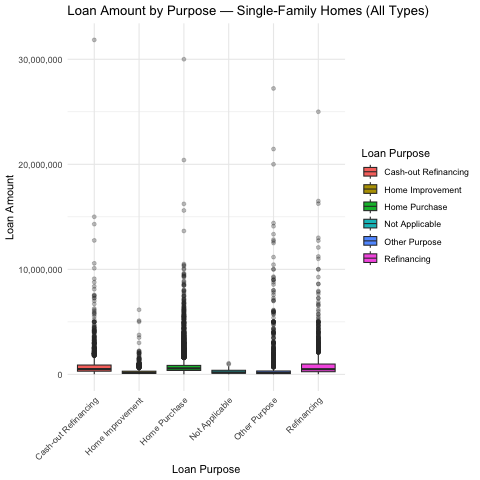

In [16]:
%%R
library(ggplot2)
library(dplyr)
library(scales)

ggplot(
  df %>% filter(grepl("Single Family", derived_dwelling_category)), 
  aes(x = loan_purpose_label, y = loan_amount, fill = loan_purpose_label)
) +
  geom_boxplot(outlier.alpha = 0.3) +
  scale_y_continuous(labels = comma) +
  labs(
    title = "Loan Amount by Purpose — Single-Family Homes (All Types)",
    x = "Loan Purpose",
    y = "Loan Amount",
    fill = "Loan Purpose"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [12]:
%%R
library(ggplot2)
library(dplyr)
library(scales)

df_single_family <- df %>%
  filter(grepl("Single Family", derived_dwelling_category))

ggplot(
  df_single_family, 
  aes(x = loan_purpose_label, y = loan_amount, fill = loan_purpose_label)
) +
  geom_boxplot(outlier.alpha = 0.1) +
  facet_wrap(~ derived_dwelling_category) +
  scale_y_continuous(labels = comma) +
  labs(
    title = "Loan Amount by Purpose — Single-Family Homes (Site-Built vs Manufactured)",
    x = "Loan Purpose",
    y = "Loan Amount",
    fill = "Loan Purpose"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Error in UseMethod("filter") : 
  no applicable method for 'filter' applied to an object of class "function"


RInterpreterError: Failed to parse and evaluate line 'library(ggplot2)\nlibrary(dplyr)\nlibrary(scales)\n\ndf_single_family <- df %>%\n  filter(grepl("Single Family", derived_dwelling_category))\n\nggplot(\n  df_single_family, \n  aes(x = loan_purpose_label, y = loan_amount, fill = loan_purpose_label)\n) +\n  geom_boxplot(outlier.alpha = 0.1) +\n  facet_wrap(~ derived_dwelling_category) +\n  scale_y_continuous(labels = comma) +\n  labs(\n    title = "Loan Amount by Purpose — Single-Family Homes (Site-Built vs Manufactured)",\n    x = "Loan Purpose",\n    y = "Loan Amount",\n    fill = "Loan Purpose"\n  ) +\n  theme_minimal() +\n  theme(axis.text.x = element_text(angle = 45, hjust = 1))\n'.
R error message: 'Error in UseMethod("filter") : \n  no applicable method for \'filter\' applied to an object of class "function"'
R stdout:

Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Error in UseMethod("filter") : 
  no applicable method for 'filter' applied to an object of class "function"

In [10]:
%%R
library(ggrepel)

df_multifamily <- df %>%
  dplyr::filter(grepl("Multifamily", derived_dwelling_category))


# Filter outliers in multifamily loans
df_multifamily_outliers <- df_multifamily %>%
  filter(loan_amount > 5000000)

# Plot with labels
ggplot(
  df_multifamily,
  aes(x = loan_purpose_label, y = loan_amount, fill = loan_purpose_label)
) +
  geom_boxplot(outlier.alpha = 0.4) +
  geom_text_repel(
    data = df_multifamily_outliers,
    aes(label = census_tract),
    size = 3,
    color = "black",
    max.overlaps = 10
  ) +
  facet_wrap(~ derived_dwelling_category) +
  scale_y_continuous(labels = scales::comma) +
  labs(
    title = "Loan Amount by Purpose — Multi-Family Homes (Labeled Outliers)",
    x = "Loan Purpose",
    y = "Loan Amount",
    fill = "Loan Purpose"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Error in UseMethod("filter") : 
  no applicable method for 'filter' applied to an object of class "function"


RInterpreterError: Failed to parse and evaluate line 'library(ggrepel)\n\ndf_multifamily <- df %>%\n  dplyr::filter(grepl("Multifamily", derived_dwelling_category))\n\n\n# Filter outliers in multifamily loans\ndf_multifamily_outliers <- df_multifamily %>%\n  filter(loan_amount > 5000000)\n\n# Plot with labels\nggplot(\n  df_multifamily,\n  aes(x = loan_purpose_label, y = loan_amount, fill = loan_purpose_label)\n) +\n  geom_boxplot(outlier.alpha = 0.4) +\n  geom_text_repel(\n    data = df_multifamily_outliers,\n    aes(label = census_tract),\n    size = 3,\n    color = "black",\n    max.overlaps = 10\n  ) +\n  facet_wrap(~ derived_dwelling_category) +\n  scale_y_continuous(labels = scales::comma) +\n  labs(\n    title = "Loan Amount by Purpose — Multi-Family Homes (Labeled Outliers)",\n    x = "Loan Purpose",\n    y = "Loan Amount",\n    fill = "Loan Purpose"\n  ) +\n  theme_minimal() +\n  theme(axis.text.x = element_text(angle = 45, hjust = 1))\n'.
R error message: 'Error in UseMethod("filter") : \n  no applicable method for \'filter\' applied to an object of class "function"'

T-test for single vs multi homes and mean loan amounts (site-built units only)

In [11]:
%%R
df_compare <- df %>%
  filter(
    derived_dwelling_category %in% c(
      "Single Family (1-4 Units):Site-Built",
      "Multifamily:Site-Built"
    )
  ) %>%
  select(loan_amount, derived_dwelling_category) %>%
  mutate(
    dwelling_type = ifelse(
      grepl("Single Family", derived_dwelling_category),
      "Single Family",
      "Multifamily"
    )
  )


Error in UseMethod("filter") : 
  no applicable method for 'filter' applied to an object of class "function"


RInterpreterError: Failed to parse and evaluate line 'df_compare <- df %>%\n  filter(\n    derived_dwelling_category %in% c(\n      "Single Family (1-4 Units):Site-Built",\n      "Multifamily:Site-Built"\n    )\n  ) %>%\n  select(loan_amount, derived_dwelling_category) %>%\n  mutate(\n    dwelling_type = ifelse(\n      grepl("Single Family", derived_dwelling_category),\n      "Single Family",\n      "Multifamily"\n    )\n  )\n'.
R error message: 'Error in UseMethod("filter") : \n  no applicable method for \'filter\' applied to an object of class "function"'

In [19]:
%%R
t_test_result <- t.test(
  loan_amount ~ dwelling_type,
  data = df_compare
)

t_test_result



	Welch Two Sample t-test

data:  loan_amount by dwelling_type
t = 3.1493, df = 39.007, p-value = 0.003136
alternative hypothesis: true difference in means between group Multifamily and group Single Family is not equal to 0
95 percent confidence interval:
  804092 3691329
sample estimates:
  mean in group Multifamily mean in group Single Family 
                  2936500.0                    688789.7 



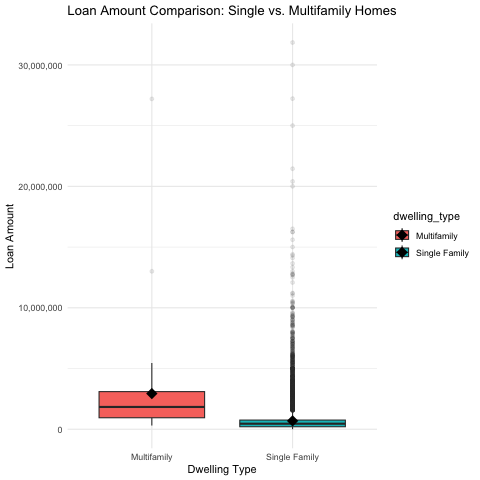

In [30]:
%%R
library(ggplot2)
library(scales)

ggplot(df_compare, aes(x = dwelling_type, y = loan_amount, fill = dwelling_type)) +
  geom_boxplot(outlier.alpha = 0.1) +
  stat_summary(fun = mean, geom = "point", shape = 18, size =5, color = "black") +
  scale_y_continuous(labels = comma) +
  labs(
    title = "Loan Amount Comparison: Single vs. Multifamily Homes",
    x = "Dwelling Type",
    y = "Loan Amount"
  ) +
  theme_minimal()


# Chi-square — Loan Purpose vs. Denial

In [39]:
%%R
df_chi_denial <- df %>%
  filter(!is.na(loan_purpose_label), !is.na(action_taken)) %>%
  mutate(
    denial_flag = case_when(
      action_taken %in% c(3, 7) ~ "Denied",  # 3 = Denied, 7 = Preapproval Denied
      TRUE ~ "Approved/Other"
    )
  )


In [40]:
%%R
table_denial <- table(df_chi_denial$loan_purpose_label, df_chi_denial$denial_flag)
table_denial


                      
                       Approved/Other Denied
  Cash-out Refinancing           2027    167
  Home Improvement               1547   1914
  Home Purchase                 11754    761
  Not Applicable                   39      0
  Other Purpose                  1603   1378
  Refinancing                    2494    463

In [41]:
%%R
chi_denial_result <- chisq.test(table_denial)
chi_denial_result


	Pearson's Chi-squared test

data:  table_denial
X-squared = 5877.1, df = 5, p-value < 2.2e-16



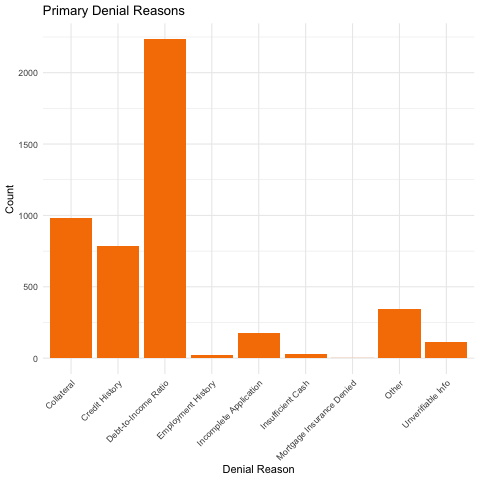

In [50]:
%%R
df_denials <- df %>%
  filter(action_taken %in% c(3, 7)) %>%
  mutate(
    denial_reason_label = recode(as.character(`denial_reason.1`),
      `1` = "Debt-to-Income Ratio",
      `2` = "Employment History",
      `3` = "Credit History",
      `4` = "Collateral",
      `5` = "Insufficient Cash",
      `6` = "Unverifiable Info",
      `7` = "Incomplete Application",
      `8` = "Mortgage Insurance Denied",
      `9` = "Other",
      .default = "Unknown"
    )
  )

ggplot(df_denials, aes(x = denial_reason_label)) +
  geom_bar(fill = "#f77f00") +
  labs(
    title = "Primary Denial Reasons",
    x = "Denial Reason",
    y = "Count"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


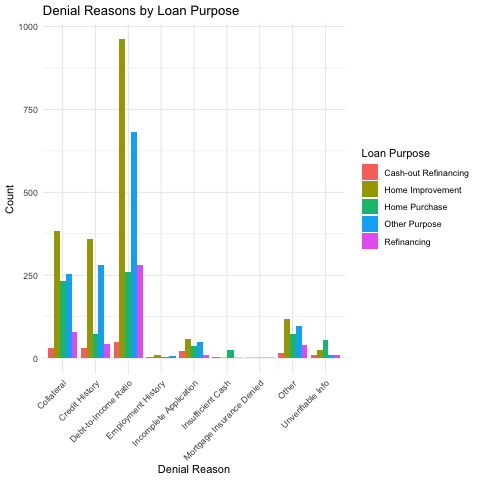

In [51]:
%%R
ggplot(df_denials, aes(x = denial_reason_label, fill = loan_purpose_label)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Denial Reasons by Loan Purpose",
    x = "Denial Reason",
    y = "Count",
    fill = "Loan Purpose"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# denial reason by loan purpose (singe household)

In [59]:
%%R
library(dplyr)

denial_rate_by_tract <- df %>%
  filter(!is.na(census_tract), !is.na(action_taken)) %>%
  mutate(
    denial_flag = case_when(
      action_taken %in% c(3, 7) ~ 1,  # Denied
      TRUE ~ 0
    )
  ) %>%
  group_by(census_tract) %>%
  summarise(
    total_loans = n(),
    total_denied = sum(denial_flag),
    denial_rate = total_denied / total_loans
  )


In [60]:
%%R
library(tidycensus)
library(sf)

# Load geometry for NYC census tracts
nyc_shapes <- get_acs(
  geography = "tract",
  state = "NY",
  county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
  variables = "B01003_001",  # Total population (used to pull the shapes)
  year = 2021,
  geometry = TRUE
)


Getting data from the 2017-2021 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'


In [64]:
%%R
nyc_denial_map <- nyc_shapes %>%
  left_join(
    denial_rate_by_tract %>% mutate(census_tract = as.character(census_tract)),
    by = c("GEOID" = "census_tract")
  )


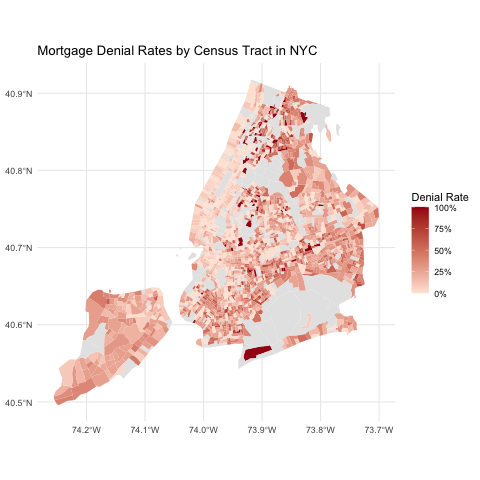

In [67]:
%%R
ggplot(nyc_denial_map) +
  geom_sf(aes(fill = denial_rate), color = NA) +
  scale_fill_gradient(
    low = "#fee5d9",  # light pink
    high = "#a50f15", # deep red
    na.value = "grey90",
    labels = scales::percent_format(accuracy = 1)
  ) +
  labs(
    title = "Mortgage Denial Rates by Census Tract in NYC",
    fill = "Denial Rate"
  ) +
  theme_minimal()


# Denial rate and income 

In [68]:
%%R
df$denied_flag <- ifelse(df$action_taken %in% c(3, 7), 1, 0)


In [ ]:
%%R
glm(denied_flag ~ income + loan_amount + loan_purpose_label + derived_dwelling_category, 
    data = df, family = "binomial")


Error in eval(predvars, data, env) : object 'denied_flag' not found


RInterpreterError: Failed to parse and evaluate line 'glm(denied_flag ~ income + loan_amount + loan_purpose_label + derived_dwelling_category, \n    data = df, family = "binomial")\n'.
R error message: "Error in eval(predvars, data, env) : object 'denied_flag' not found"

In [53]:
%%R
library(dplyr)

denial_reason_pct <- df_denials %>%
  group_by(denial_reason_label) %>%
  summarise(n = n()) %>%
  mutate(percent = n / sum(n))


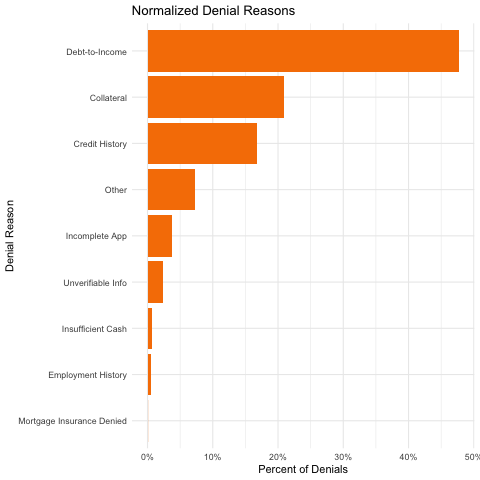

In [54]:
%%R
library(ggplot2)
library(scales)

ggplot(denial_reason_pct, aes(x = reorder(denial_reason_label, percent), y = percent)) +
  geom_col(fill = "#f77f00") +
  coord_flip() +
  scale_y_continuous(labels = percent_format(accuracy = 1)) +
  labs(
    title = "Normalized Denial Reasons",
    x = "Denial Reason",
    y = "Percent of Denials"
  ) +
  theme_minimal()


In [37]:
%%R
df_chi <- df_chi %>%
  mutate(
    loan_purpose_simplified = case_when(
      loan_purpose_label %in% c("Home Purchase", "Home Improvement", "Refinancing", "Cash-out Refinancing") ~ loan_purpose_label,
      TRUE ~ "Other"
    )
  )


# Denial rate + minority data 

In [76]:
%%R
df_tract_denials <- df %>%
  filter(!is.na(census_tract), !is.na(action_taken), !is.na(tract_minority_population_percent)) %>%
  mutate(
    denial_flag = ifelse(action_taken %in% c(3, 7), 1, 0)
  ) %>%
  group_by(census_tract, tract_minority_population_percent) %>%
  summarise(
    denial_rate = mean(denial_flag),
    total_loans = n(),
    .groups = "drop"
  ) %>%
  mutate(
    minority_group = ifelse(tract_minority_population_percent >= 50, "High Minority", "Low Minority")
  )


Error in `filter()`:
ℹ In argument: `!is.na(tract_minority_population_percent)`.
Caused by error:
! object 'tract_minority_population_percent' not found
Run `rlang::last_trace()` to see where the error occurred.

Error in filter(., !is.na(census_tract), !is.na(action_taken), !is.na(tract_minority_population_percent)) : 
  
Caused by error:
! object 'tract_minority_population_percent' not found


RInterpreterError: Failed to parse and evaluate line 'df_tract_denials <- df %>%\n  filter(!is.na(census_tract), !is.na(action_taken), !is.na(tract_minority_population_percent)) %>%\n  mutate(\n    denial_flag = ifelse(action_taken %in% c(3, 7), 1, 0)\n  ) %>%\n  group_by(census_tract, tract_minority_population_percent) %>%\n  summarise(\n    denial_rate = mean(denial_flag),\n    total_loans = n(),\n    .groups = "drop"\n  ) %>%\n  mutate(\n    minority_group = ifelse(tract_minority_population_percent >= 50, "High Minority", "Low Minority")\n  )\n'.
R error message: "Error in filter(., !is.na(census_tract), !is.na(action_taken), !is.na(tract_minority_population_percent)) : \n  \nCaused by error:\n! object 'tract_minority_population_percent' not found"